In [3]:
import pandas as pd
abalone=pd.read_csv("abalone.csv", header=None)

In [4]:
type(abalone)

pandas.core.frame.DataFrame

In [5]:
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4177 non-null   object 
 1   1       4177 non-null   float64
 2   2       4177 non-null   float64
 3   3       4177 non-null   float64
 4   4       4177 non-null   float64
 5   5       4177 non-null   float64
 6   6       4177 non-null   float64
 7   7       4177 non-null   float64
 8   8       4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
abalone.describe()

,1,2,3,4,5,6,7,8
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
abalone.columns=["sex","length","diameter","Height"
                ,"Whole Weight","Shucked Weight","Viscera Weight",
                 "Shell Weight","Rings"]

In [9]:
abalone.head()

,sex,length,diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole Weight    4177 non-null   float64
 5   Shucked Weight  4177 non-null   float64
 6   Viscera Weight  4177 non-null   float64
 7   Shell Weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [11]:
abalone=abalone.drop("sex",axis=1)

In [12]:
abalone.head()

,length,diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<AxesSubplot:>

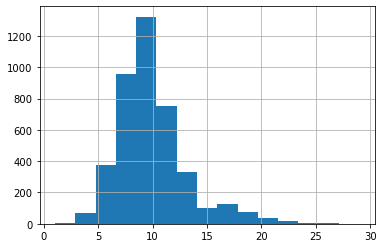

In [13]:
abalone["Rings"].hist(bins=15)

In [14]:
correlation_matrix=abalone.corr()
correlation_matrix["Rings"]

length            0.556720
diameter          0.574660
Height            0.557467
Whole Weight      0.540390
Shucked Weight    0.420884
Viscera Weight    0.503819
Shell Weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [15]:
X=abalone.drop("Rings",axis=1)
X=X.values
y=abalone["Rings"]
y=y.values

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12345)

In [17]:
from sklearn.neighbors import KNeighborsRegressor
knn_model=KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds=knn_model.predict(X_train)
mse=mean_squared_error(y_train,train_preds)
rmse=sqrt(mse)

In [19]:
print("Error rate on training data :",rmse)

Error rate on training data : 1.6538366794859511


In [20]:
test_preds=knn_model.predict(X_test)
mse=mean_squared_error(y_test,test_preds)
rmse=sqrt(mse)

In [21]:
print("Error rate on training data :",rmse)

Error rate on training data : 2.375417924000521


## Conclusion : our model is overfitting badly since the error rate in out training is way lower than our test error

In [22]:
from sklearn.model_selection import GridSearchCV
parameters={"n_neighbors":range(1,50)}
gridsearch=GridSearchCV(KNeighborsRegressor(),parameters)
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [23]:
gridsearch.best_params_

{'n_neighbors': 25}

In [24]:
train_preds_grid=gridsearch.predict(X_train)
train_mse=mean_squared_error(y_train,train_preds_grid)
train_rmse=sqrt(train_mse)

test_preds_grid=gridsearch.predict(X_test)
test_mse=mean_squared_error(y_test,test_preds_grid)
test_rmse=sqrt(test_mse)

print("Train Error :", train_rmse)
print("Test error :" ,test_rmse)


Train Error : 2.0731180327543384
Test error : 2.1700197339962175
